## Tutorial para resolução da Lista 2 de Econometria

#### Matrizes
Para trabalhar com matrizes vocês irão precisar do pacote numpy. Para facilitar a estrita, salvaremos numpy como np

In [28]:
import numpy as np 
from numpy import *
from numpy.linalg import inv

In [29]:
a = np.matrix('1 2; 3 4')
a

matrix([[1, 2],
        [3, 4]])

In [30]:
inva = inv(a)
inva

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [31]:
np.power(a, 2)

matrix([[ 1,  4],
        [ 9, 16]])

#### Histograma

Para realização de histogramas iremos abrir o arquivo que neste exemplo é um dos arquivos.dta que está na pasta arquivos.dta 
Note que o caminho 'arquivos.dta/ceosal2.dta' abaixo é de tão modo pois abri este jupyter notebook em uma pasta que possui como subpasta "arquivos.dta".
Aqui também precisaremos do pacote pandas e matplotlib.pyplot e contruiremos por fim uma função que retorna o histograma a partir da variável selecionada, calcula média, máximo e 
salva o histograma na pasta em que este jupyter notebook foi aberto. 

In [1]:
import pandas as pd

In [21]:
df = pd.read_stata('arquivos.dta/ceosal2.dta')

In [17]:
df


,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
0,1161,49,1,1,9,2,6200.0,966,23200.0,7.057037,8.732305,10.051908,81,4,15.580646
1,600,43,1,1,10,10,283.0,48,1100.0,6.396930,5.645447,7.003066,100,100,16.961130
2,379,51,1,1,9,3,169.0,40,1100.0,5.937536,5.129899,7.003066,81,9,23.668638
3,651,55,1,0,22,22,1100.0,-54,1000.0,6.478509,7.003066,6.907755,484,484,-4.909091
4,497,44,1,1,8,6,351.0,28,387.0,6.208590,5.860786,5.958425,64,36,7.977208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,264,63,1,0,42,3,334.0,43,480.0,5.575949,5.811141,6.173786,1764,9,12.874251
173,185,58,1,0,39,1,766.0,49,560.0,5.220356,6.641182,6.327937,1521,1,6.396867
174,387,71,1,1,32,13,432.0,28,477.0,5.958425,6.068426,6.167517,1024,169,6.481482
175,2220,63,1,1,18,18,277.0,-80,540.0,7.705263,5.624018,6.291569,324,324,-28.880867


In [18]:
df['lsalary']

0      7.057037
1      6.396930
2      5.937536
3      6.478509
4      6.208590
         ...   
172    5.575949
173    5.220356
174    5.958425
175    7.705263
176    6.098074
Name: lsalary, Length: 177, dtype: float32

In [19]:
import statsmodels.api as sm


In [22]:
X = df[['salary','sales']]# here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['ceoten']

In [23]:
model = sm.OLS(Y,X)
results = model.fit()
predictedValues = results.predict()
#print predictedValues
res = Y - predictedValues

In [9]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Define functions
def histogram(type_hist, data, varname, place):
    """
    Plot histogram from given list values.
    Histogram types: fixed_bin_size or fixed_number_bins
    """
    title = 'Histograma - %s' %place
    figname = 'hist_%s.png' %place
    text = 'média = %.2f\nmáximo = %.2f' % (data.mean(), max(data))

    n_bins = 30
    bin_size = 5
    if type_hist == 'fixed_bin_size':
        bins = np.arange(0, 100, bin_size)
    elif type_hist == 'fixed_number_bins':
        bins = np.linspace(math.ceil(min(data)), math.floor(max(data)), n_bins)
 
    plt.xlim([min(data)-5, max(data)+5])
    plt.hist(data, bins=bins)
    plt.title(title)
    plt.xlabel(varname)
#plt.ylabel('contagens')
    ax = plt.gca() # Get axis handle for text positioning
    plt.text(0.95, 0.95, text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
    plt.savefig(figname)
    #plt.close()

 

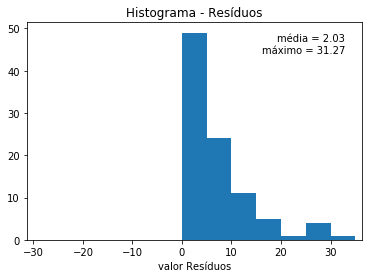

In [24]:
histogram('fixed_bin_size', res, 'valor Resíduos', 'Resíduos')